# Cálculo de Métricas de Evaluación para Clasificación:

## Ejemplo/Ejercicio:

In [14]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Cargar el conjunto de datos
digits = load_digits()
X, y = digits.data, digits.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo usando regresion logistica
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy_sk = accuracy_score(y_test, y_pred)
precision_sk = precision_score(y_test, y_pred, average='weighted')
recall_sk = recall_score(y_test, y_pred, average='weighted')
f1_sk = f1_score(y_test, y_pred, average='weighted')

# Mostrar las métricas
print("Exactitud:", accuracy_sk)
print("Precisión:", precision_sk)
print("Recuperación o sensibilidad (recall):", recall_sk)
print("Puntuación o medida F1 (F1-score):", f1_sk)

Exactitud: 0.9722222222222222
Precisión: 0.9725599634194969
Recuperación o sensibilidad (recall): 0.9722222222222222
Puntuación o medida F1 (F1-score): 0.9722809227439473


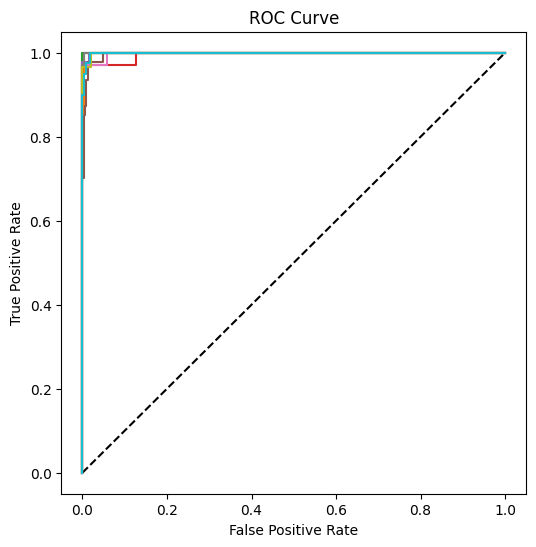

AUC: 0.9989410491653089


In [15]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(10): # Assuming 10 classes
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test == i, y_scores[:, i])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
for i in range(10):
    plt.plot(fpr[i], tpr[i], label='Class {}'.format(i))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Predict probabilities for the positive class
y_scores = model.predict_proba(X_test)
# Calculate AUC
auc = roc_auc_score(y_test, y_scores, multi_class='ovr')
print("AUC:", auc)

### TAREA en clase/casa (reference - pumpkings homework):

Usando alguna herramienta de IA, consultar:

1. Qué es y cómo se obtiene la matriz de confusíón.
2. Analizar el resultado de la matriz de confusión del anterior ejemplo/ejercicio.
3. Obtener las formulas de TP, TN, FP, FN, precision, recall, F1-score, support.
4. Apartir de la matriz de confusión, interpretar los resultados del item 3.
5. Con base en lo anterior, calcular, graficar e interpretar: FPR, TPR, ROC, AUC.

## Qué es y cómo se obtiene la matriz de confusíón.

La matriz de confusión es una herramienta que se utiliza para evaluar el rendimiento de un modelo de clasificación. Esta matriz permite visualizar el desempeño del algoritmo, mostrando las verdaderas etiquetas frente a las predicciones del modelo. La matriz de confusión tiene la forma de una tabla cuadrada que muestra los recuentos de las instancias clasificadas correctamente e incorrectamente para cada clase.

Pandas y numpy:

In [16]:
import pandas as pd
import numpy as np

# Obtener las clases únicas
classes = np.unique(np.concatenate((y_test, y_pred)))

# Crear una matriz de confusión vacía
conf_matrix = pd.DataFrame(
    np.zeros((len(classes), len(classes)), dtype=int),
    index=classes, columns=classes
)

# Rellenar la matriz de confusión
for actual, predicted in zip(y_test, y_pred):
    conf_matrix.at[actual, predicted] += 1

print(conf_matrix)
print('sklearn')
cm_sk = confusion_matrix(y_test, y_pred)
print(cm_sk)

    0   1   2   3   4   5   6   7   8   9
0  33   0   0   0   0   0   0   0   0   0
1   0  28   0   0   0   0   0   0   0   0
2   0   0  33   0   0   0   0   0   0   0
3   0   0   0  33   0   1   0   0   0   0
4   0   1   0   0  45   0   0   0   0   0
5   0   0   1   0   0  44   1   0   0   1
6   0   0   0   0   0   1  34   0   0   0
7   0   0   0   0   0   1   0  33   0   0
8   0   0   0   0   0   1   0   0  29   0
9   0   0   0   1   0   0   0   0   1  38
sklearn
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


## Analizar el resultado de la matriz de confusión:

    Clase 0:
        Correctas (0,0): 33
        Incorrectas: 0
        El modelo clasifica todas las instancias de la clase 0 correctamente.

    Clase 1:
        Correctas (1,1): 28
        Incorrectas (1,4): 1
        El modelo clasifica 28 instancias correctamente y 1 instancia de la clase 4 se clasifica incorrectamente como clase 1.

    Clase 2:
        Correctas (2,2): 33
        Incorrectas: 0
        El modelo clasifica todas las instancias de la clase 2 correctamente.

    Clase 3:
        Correctas (3,3): 33
        Incorrectas (3,5): 1
        El modelo clasifica 33 instancias correctamente y 1 instancia de la clase 5 se clasifica incorrectamente como clase 3.

    Clase 4:
        Correctas (4,4): 45
        Incorrectas (4,1): 1
        El modelo clasifica 45 instancias correctamente y 1 instancia de la clase 1 se clasifica incorrectamente como clase 4.

    Clase 5:
        Correctas (5,5): 44
        Incorrectas (5,2): 1, (5,6): 1, (5,9): 1
        El modelo clasifica 44 instancias correctamente y tiene 3 errores: 1 instancia de la clase 2, 1 instancia de la clase 6, y 1 instancia de la clase 9 se clasifican incorrectamente como clase 5.

    Clase 6:
        Correctas (6,6): 34
        Incorrectas (6,5): 1
        El modelo clasifica 34 instancias correctamente y 1 instancia de la clase 5 se clasifica incorrectamente como clase 6.

    Clase 7:
        Correctas (7,7): 33
        Incorrectas (7,5): 1
        El modelo clasifica 33 instancias correctamente y 1 instancia de la clase 5 se clasifica incorrectamente como clase 7.

    Clase 8:
        Correctas (8,8): 29
        Incorrectas (8,5): 1
        El modelo clasifica 29 instancias correctamente y 1 instancia de la clase 5 se clasifica incorrectamente como clase 8.

    Clase 9:
        Correctas (9,9): 38
        Incorrectas (9,3): 1, (9,8): 1
        El modelo clasifica 38 instancias correctamente y tiene 2 errores: 1 instancia de la clase 3 y 1 instancia de la clase 8 se clasifican incorrectamente como clase 9.

Conclusiones

    Exactitud alta: El modelo clasifica correctamente la mayoría de las instancias en todas las clases.
    Errores esparcidos: Los errores están distribuidos en varias clases, pero la mayoría de los errores son mínimos (1 instancia incorrecta por clase en la mayoría de los casos).
    Clases problemáticas: La clase 5 tiene más errores (3 en total), lo que sugiere que puede haber más confusión con esta clase comparado con otras.

El modelo parece funcionar bastante bien en general, pero podrías investigar más a fondo las instancias donde se producen errores para entender por qué se están clasificando incorrectamente y si hay patrones en esos errores que puedas abordar.

## Obtener las formulas de TP, TN, FP, FN, precision, recall, F1-score, support.

* Verdaderos Positivos (TP)
* Verdaderos Negativos (TN)
* Falsos Positivos (FP)
* Falsos Negativos (FN)
* precisión (precision)
* recall (recall)
* F1-score
* soporte (support):

1. Matriz de Confusión $$ \text{confusion_matrix} $$

La matriz de confusión tiene la siguiente estructura para un problema binario:

```
           Predicted
            0     1
Actual 0   TN    FP
       1   FN    TP
```

1. Verdaderos Positivos (TP)


Número de instancias correctamente clasificadas como la clase actual.
$$
TPi=\text{confusion_matrix}[i,i]
$$

2. Falsos Positivos (FP)

Número de instancias clasificadas incorrectamente como la clase actual.
$$
FP_i = \sum_{j=0}^{N-1} \text{confusion_matrix}[j, i] - TP_i
$$

3. Falsos Negativos (FN)

Número de instancias de la clase actual clasificadas incorrectamente como otras clases.
$$
FN_i = \sum_{j=0}^{N-1} \text{confusion_matrix}[i, j] - TP_i
$$
4. Verdaderos Negativos (TN)

Número de instancias correctamente clasificadas como no pertenecientes a la clase actual.
$$
TN_i = \sum_{j=0}^{N-1} \sum_{k=0}^{N-1} \text{confusion_matrix}[j, k] - (TP_i + FP_i + FN_i)
$$

Estas fórmulas te permiten calcular las métricas clave para evaluar el rendimiento de un modelo de clasificación.

5. Precisión (Precision)

Proporción de instancias predichas correctamente entre las predichas como la clase actual.
$$
\text{Precisión}_i = \frac{TP_i}{TP_i + FP_i}
$$
6. Recall (Sensibilidad)

Proporción de instancias de la clase actual clasificadas correctamente.
$$
\text{Recall}_i = \frac{TP_i}{TP_i + FN_i}
$$
7. F1-Score

Media armónica de la precisión y el recall.
$$
\text{F1-Score}_i = \frac{2 \cdot \text{Precisión}_i \cdot \text{Recall}_i}{\text{Precisión}_i + \text{Recall}_i}
$$

8. Soporte (Support)

Número total de instancias de la clase actual en el conjunto de datos.
$$
\text{Soporte}_i = TP_i + FN_i
$$

In [17]:
# Número de clases
num_classes = conf_matrix.shape[0]

# Inicializar TP, TN, FP, FN
TP = np.zeros(num_classes)
TN = np.zeros(num_classes)
FP = np.zeros(num_classes)
FN = np.zeros(num_classes)

# Calcular TP, TN, FP, FN para cada clase
for i in range(num_classes):
    TP[i] = conf_matrix.iloc[i, i]  # Use .iloc for integer-based indexing
    FP[i] = conf_matrix.iloc[:, i].sum() - TP[i]
    FN[i] = conf_matrix.iloc[i, :].sum() - TP[i]
    TN[i] = conf_matrix.values.sum() - (TP[i] + FP[i] + FN[i])

# Calcular precisión, recall, F1-score y soporte
accuracy_m = (TP + TN) / (TP + TN + FP + FN)
precision_m = TP / (TP + FP)
recall_m = TP / (TP + FN)
f1_score_m = 2 * (precision_m * recall_m) / (precision_m + recall_m)
support_m = TP + FN

# Crear un DataFrame para mostrar los resultados
results = pd.DataFrame({
    'TP': TP,
    'TN': TN,
    'FP': FP,
    'FN': FN,
    'Accuracy': accuracy_m,
    'Precision': precision_m,
    'Recall': recall_m,
    'F1-Score': f1_score_m,
    'Support': support_m
})
print(results)

print("\n\n\n\nMANUAL")
print("Accuracy:", accuracy_m.mean())
print("Precision:", precision_m.mean())
print("Recall:", recall_m.mean())
print("F1:", f1_score_m.mean())

print("\n\nSKLEARN")
print("Exactitud:", accuracy_sk)
print("Precisión:", precision_sk.mean())
print("Recuperación o sensibilidad (recall):", recall_sk.mean())
print("Puntuación o medida F1 (F1-score):", f1_sk.mean())

     TP     TN   FP   FN  Accuracy  Precision    Recall  F1-Score  Support
0  33.0  327.0  0.0  0.0  1.000000   1.000000  1.000000  1.000000     33.0
1  28.0  331.0  1.0  0.0  0.997222   0.965517  1.000000  0.982456     28.0
2  33.0  326.0  1.0  0.0  0.997222   0.970588  1.000000  0.985075     33.0
3  33.0  325.0  1.0  1.0  0.994444   0.970588  0.970588  0.970588     34.0
4  45.0  314.0  0.0  1.0  0.997222   1.000000  0.978261  0.989011     46.0
5  44.0  309.0  4.0  3.0  0.980556   0.916667  0.936170  0.926316     47.0
6  34.0  324.0  1.0  1.0  0.994444   0.971429  0.971429  0.971429     35.0
7  33.0  326.0  0.0  1.0  0.997222   1.000000  0.970588  0.985075     34.0
8  29.0  329.0  1.0  1.0  0.994444   0.966667  0.966667  0.966667     30.0
9  38.0  319.0  1.0  2.0  0.991667   0.974359  0.950000  0.962025     40.0




MANUAL
Accuracy: 0.9944444444444447
Precision: 0.9735814591088425
Recall: 0.9743702791014647
F1: 0.9738640962411946


SKLEARN
Exactitud: 0.9722222222222222
Precisión: 0.97

## Interpretación de las Métricas

1. Verdaderos Positivos (TP):
* TP es el número de instancias que fueron correctamente clasificadas como una clase específica. Un alto valor de TP indica que el modelo está acertando en muchas predicciones de esa clase.
* Ejemplo: La clase 0 tiene 33 TP, lo que significa que 33 instancias fueron correctamente clasificadas como clase 0.

2. Verdaderos Negativos (TN):
* TN es el número de instancias que no pertenecen a una clase específica y fueron correctamente no clasificadas como tal. Un alto valor de TN indica que el modelo está correctamente identificando instancias que no pertenecen a esa clase.
* Ejemplo: La clase 0 tiene 327 TN, lo que significa que 327 instancias fueron correctamente identificadas como no pertenecientes a la clase 0.

3. Falsos Positivos (FP):
* FP es el número de instancias que no pertenecen a una clase específica pero fueron incorrectamente clasificadas como tal. Un alto valor de FP indica muchos errores del tipo "falso positivo".
* Ejemplo: La clase 5 tiene 4 FP, lo que significa que 4 instancias fueron incorrectamente clasificadas como clase 5.

4. Falsos Negativos (FN):
* FN es el número de instancias que pertenecen a una clase específica pero fueron incorrectamente clasificadas como otra clase. Un alto valor de FN indica muchos errores del tipo "falso negativo".
* Ejemplo: La clase 4 tiene 1 FN, lo que significa que 1 instancia fue incorrectamente no clasificada como clase 4.

5. Precisión (Precision):
* Precisión es la proporción de instancias correctamente clasificadas entre las predichas como esa clase. Una alta precisión indica pocos falsos positivos.
* Ejemplo: La clase 1 tiene una precisión de 0.965517, lo que significa que el 96.55% de las predicciones de la clase 1 fueron correctas.

6. Recall (Sensibilidad):
* Recall es la proporción de instancias correctamente clasificadas entre todas las que realmente pertenecen a esa clase. Un alto recall indica pocos falsos negativos.
* Ejemplo: La clase 5 tiene un recall de 0.936170, lo que significa que el 93.62% de las instancias reales de la clase 5 fueron correctamente clasificadas.

7. F1-Score:
* F1-Score es la media armónica de la precisión y el recall. Un alto F1-Score indica un buen equilibrio entre precisión y recall.
* Ejemplo: La clase 3 tiene un F1-Score de 0.970588, indicando un buen equilibrio entre precisión y recall para esa clase.

8. Soporte (Support):
* Soporte es el número total de instancias de una clase específica en el conjunto de datos.
* Ejemplo: La clase 4 tiene un soporte de 46, lo que significa que hay 46 instancias de la clase 4 en el conjunto de datos.

Análisis General del Modelo

* Precisión y Recall Altos: En general, las clases tienen una precisión y recall bastante altos, lo que indica que el modelo está funcionando bien tanto en la identificación correcta de las instancias como en la minimización de los errores de clasificación.
* Errores de Falsos Positivos y Falsos Negativos: La clase 5 tiene más falsos positivos (4) y falsos negativos (3) que las otras clases, lo que sugiere que podría haber una confusión mayor entre esta clase y otras. Es importante investigar por qué esta clase tiene más errores y si hay un patrón en estas confusiones.
* F1-Score: Los F1-Scores altos en la mayoría de las clases indican un buen equilibrio entre precisión y recall, lo que significa que el modelo no solo está clasificando correctamente muchas instancias, sino que también está minimizando tanto los falsos positivos como los falsos negativos.

Este análisis detallado de las métricas te permite identificar las fortalezas y debilidades del modelo, y proporciona una base para mejorar el modelo si es necesario.

 ## Gráficas

1. Tasa de Falsos Positivos (FPR)
2. Tasa de Verdaderos Positivos (TPR)
3. Curva ROC (Receiver Operating Characteristic)
4. AUC (Área Bajo la Curva)

### Tasa de Falsos Positivos (FPR)

Representa la proporción de negativos verdaderos que fueron clasificados incorrectamente como positivos. Un FPR bajo es deseable.

$$
FPR = \frac{FP}{FP + TN}
$$

### Tasa de Verdaderos Positivos (TPR)

También conocido como sensibilidad o recall, representa la proporción de positivos verdaderos que fueron clasificados correctamente. Un TPR alto es deseable.

$$
TPR = \frac{TP}{TP + FN}
$$

###  Curva ROC (Receiver Operating Characteristic)

Muestra la relación entre TPR y FPR a varios umbrales de clasificación. Una curva más cercana a la esquina superior izquierda indica un mejor rendimiento del modelo.

### AUC (Área Bajo la Curva):
Un AUC cercano a 1 indica un modelo excelente, mientras que un AUC cercano a 0.5 indica un modelo no mejor que uno aleatorio.

$$
AUC = \int TPR \, dFPR
$$

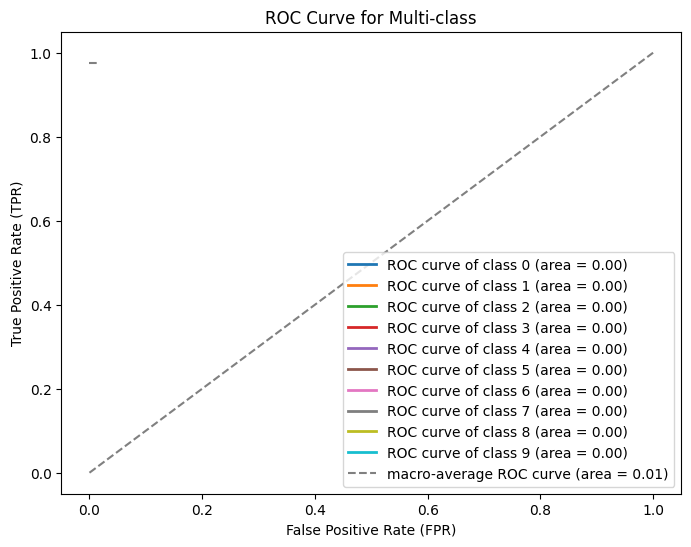

AUC scores for each class: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Macro-average AUC: 0.012452016346344597


In [23]:
import matplotlib.pyplot as plt
num_classes = conf_matrix.shape[0]

# Initialize arrays to store TPR and FPR for each class
fpr_m = {}
tpr_m = {}
roc_auc_m = []

# Calculate TPR and FPR for each class
for i in range(num_classes):
    # Instead of creating large y_true and y_scores arrays,
    # calculate TPR and FPR directly from the confusion matrix
    tp_m = conf_matrix.iloc[i, i]
    fp_m = conf_matrix.iloc[:, i].sum() - tp_m
    fn_m = conf_matrix.iloc[i, :].sum() - tp_m
    tn_m = conf_matrix.values.sum() - (tp_m + fp_m + fn_m)

    # Ensure tpr_m[i] and fpr_m[i] are always arrays, even if the denominator is zero
    tpr_m[i] = np.array([tp_m / (tp_m + fn_m)]) if (tp_m + fn_m) > 0 else np.array([0])
    fpr_m[i] = np.array([fp_m / (fp_m + tn_m)]) if (fp_m + tn_m) > 0 else np.array([0])

# Calculate macro average AUC
all_fpr = np.unique(np.concatenate([fpr_m[i] for i in range(num_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr_m[i], tpr_m[i])
mean_tpr /= num_classes

fpr_m["macro"] = all_fpr
tpr_m["macro"] = mean_tpr
macro_auc_m = np.trapz(tpr_m["macro"], fpr_m["macro"])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
# Initialize roc_auc_m as a list of zeros to avoid index out of range error
roc_auc_m = [0] * num_classes
for i in range(num_classes):
    # Calculate AUC for each class here, since roc_auc_m is now initialized
    roc_auc_m[i] = np.trapz(tpr_m[i], fpr_m[i])
    plt.plot(fpr_m[i], tpr_m[i], lw=2, label='ROC curve of class {} (area = {:.2f})'.format(i, roc_auc_m[i]))
plt.plot(fpr_m["macro"], tpr_m["macro"], label='macro-average ROC curve (area = {:.2f})'.format(macro_auc_m), linestyle='--', color='gray')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Multi-class')
plt.legend(loc='best')
plt.show()

print("AUC scores for each class:", roc_auc_m)
print("Macro-average AUC:", macro_auc_m)